# Question

## [[link](https://stackoverflow.com/questions/65896179/get-exposed-port-from-within-docker-compose#65896179)] Get exposed port from within docker-compose

# Answer

In [4]:
!cat dockerfile

FROM python:3.8

RUN python -m pip install --upgrade pip
RUN pip install pipenv

COPY Pipfile* /app/

RUN cd /app &&  pipenv lock --keep-outdated --requirements > requirements.txt

RUN pip install -r /app/requirements.txt

COPY . /app/src

WORKDIR /app/src

EXPOSE ${PORT}

CMD uwsgi --http :${PORT} --wsgi-file server.py --callable main


In [5]:
!cat docker-compose.yml

version: "3.9"
services:
  server:
    build: .
    ports:
      - "8086"
    environment:
      - PORT=8086



# [!]
No `HOST_PORT` has been provided in the `docker-compose.yml` file above.

In [18]:
!docker-compose up 

Building with native build. Learn about native build in Compose here: https://docs.docker.com/go/compose-native-build/
Building server
Sending build context to Docker daemon   38.4kB

Step 1/10 : FROM python:3.8
 ---> 4d53664a7025
Step 2/10 : RUN python -m pip install --upgrade pip
 ---> Using cache
 ---> 9a549e8b7b16
Step 3/10 : RUN pip install pipenv
 ---> Using cache
 ---> a6144725fda4
Step 4/10 : COPY Pipfile* /app/
 ---> Using cache
 ---> dee26770a0c6
Step 5/10 : RUN cd /app &&  pipenv lock --keep-outdated --requirements > requirements.txt
 ---> Using cache
 ---> 6ec6eef050f8
Step 6/10 : RUN pip install -r /app/requirements.txt
 ---> Using cache
 ---> 91e654cb1802
Step 7/10 : COPY . /app/src
 ---> aa2a5a9da395
Step 8/10 : WORKDIR /app/src
 ---> Running in dab674cdaa8d
Removing intermediate container dab674cdaa8d
 ---> 9ca4edcc70cf
Step 9/10 : EXPOSE ${PORT}
 ---> Running in fe3270892dcf
Removing intermediate container fe3270892dcf
 ---> 1ccbbad053cf
Step 10/10 : CMD uwsgi --http :

# [!]

As seen above, docker-compose can build the container just fine.
But as shown below, the container is assigned a random `HOST_PORT`, in this case `49157`.

In [19]:
!docker ps

CONTAINER ID   IMAGE                                                         COMMAND                  CREATED          STATUS          PORTS                     NAMES
de0120c61c1e   65896179-get-exposed-port-from-within-docker-compose_server   "/bin/sh -c 'uwsgi -…"   38 seconds ago   Up 38 seconds   0.0.0.0:49157->8086/tcp   65896179-get-exposed-port-from-within-docker-compose_server_1


In [21]:
!cat docker-compose.yml

version: "3.9"
services:
  server:
    build: .
    ports:
      - "8086:8086"
    environment:
      - PORT=8086



# [!]

We can solve this by providing a `HOST_PORT` as described in https://docs.docker.com/compose/networking/

In [24]:
!docker-compose up 

Building with native build. Learn about native build in Compose here: https://docs.docker.com/go/compose-native-build/
Starting 65896179-get-exposed-port-from-within-docker-compose_server_1 ... 
Attaching to 65896179-get-exposed-port-from-within-docker-compose_server_12mdone
server_1  | *** Starting uWSGI 2.0.19.1 (64bit) on [Tue Jan 26 06:15:14 2021] ***
server_1  | compiled with version: 8.3.0 on 26 January 2021 06:08:33
server_1  | os: Linux-5.4.0-64-generic #72-Ubuntu SMP Fri Jan 15 10:27:54 UTC 2021
server_1  | nodename: 9845fbae868f
server_1  | machine: x86_64
server_1  | clock source: unix
server_1  | pcre jit disabled
server_1  | detected number of CPU cores: 16
server_1  | current working directory: /app/src
server_1  | detected binary path: /usr/local/bin/uwsgi
server_1  | uWSGI running as root, you can use --uid/--gid/--chroot options
server_1  | *** WARNING: you are running uWSGI as root !!! (use the --uid flag) *** 
server_1  | *** WARNING: you are running uWSGI without it

In [25]:
!docker ps

CONTAINER ID   IMAGE                                                         COMMAND                  CREATED          STATUS         PORTS                    NAMES
9845fbae868f   65896179-get-exposed-port-from-within-docker-compose_server   "/bin/sh -c 'uwsgi -…"   37 seconds ago   Up 7 seconds   0.0.0.0:8086->8086/tcp   65896179-get-exposed-port-from-within-docker-compose_server_1


In [26]:
!curl localhost:8086

Hello World!

# [!]

Alternatively, if the `--scale` flag is to be used and multiple ports have to be chosen one can use a range of ports as `HOST_PORT` such as `8000-8004:8`

In [1]:
!docker-compose up --scale server=4

Building with native build. Learn about native build in Compose here: https://docs.docker.com/go/compose-native-build/
Recreating 65896179-get-exposed-port-from-within-docker-compose_server_1 ... 
Creating 65896179-get-exposed-port-from-within-docker-compose_server_2   ... mdone
Creating 65896179-get-exposed-port-from-within-docker-compose_server_3   ... 
Creating 65896179-get-exposed-port-from-within-docker-compose_server_4   ... 
Attaching to 65896179-get-exposed-port-from-within-docker-compose_server_1, 65896179-get-exposed-port-from-within-docker-compose_server_2, 65896179-get-exposed-port-from-within-docker-compose_server_4, 65896179-get-exposed-port-from-within-docker-compose_server_3
server_2  | *** Starting uWSGI 2.0.19.1 (64bit) on [Tue Jan 26 18:21:47 2021] ***
server_2  | compiled with version: 8.3.0 on 26 January 2021 06:08:33
server_2  | os: Linux-5.4.0-64-generic #72-Ubuntu SMP Fri Jan 15 10:27:54 UTC 2021
server_2  | nodename: 484614343fb0
server_2  | machine: x86_64
ser

^C
Gracefully stopping... (press Ctrl+C again to force)






In [2]:
!docker ps

CONTAINER ID   IMAGE                                                         COMMAND                  CREATED          STATUS          PORTS                                   NAMES
b455a3e2defe   65896179-get-exposed-port-from-within-docker-compose_server   "/bin/sh -c 'uwsgi -…"   37 seconds ago   Up 35 seconds   0.0.0.0:8003->8086/tcp                  65896179-get-exposed-port-from-within-docker-compose_server_4
484614343fb0   65896179-get-exposed-port-from-within-docker-compose_server   "/bin/sh -c 'uwsgi -…"   37 seconds ago   Up 35 seconds   0.0.0.0:8002->8086/tcp                  65896179-get-exposed-port-from-within-docker-compose_server_2
98941b0fee70   65896179-get-exposed-port-from-within-docker-compose_server   "/bin/sh -c 'uwsgi -…"   37 seconds ago   Up 35 seconds   0.0.0.0:8001->8086/tcp                  65896179-get-exposed-port-from-within-docker-compose_server_3
ddac98b79477   65896179-get-exposed-port-from-within-docker-compose_server   "/bin/sh -c 'uwsgi -…"   37 sec

In [3]:
!curl localhost:8000

Hello World!

In [4]:
!curl localhost:8001

Hello World!

In [5]:
!curl localhost:8002

Hello World!

In [6]:
!curl localhost:8003

Hello World!


# By Jayson Salazar

|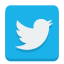|[@jdsalaro](https://twitter.com/jdsalaro)|
|-|:-|
|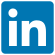|[https://linkedin.com/in/jdsalaro](http://linkedin.com/in/jdsalaro)|
|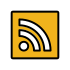|[https://jdsalaro.com](https://jdsalaro.com)|